In [1]:
import os
HOME = os.getcwd()
print(HOME)



/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [3]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Kerw8HPgNNQSSCGteOGa")
project = rf.workspace("roboflow-gw7yv").project("vehicles-openimages")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicles-OpenImages-1 in yolov8:: 100%|██████████| 2520/2520 [00:00<00:00, 8026.38it/s]


In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 117MB/s] 
New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Vehicles-OpenImages-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

/content


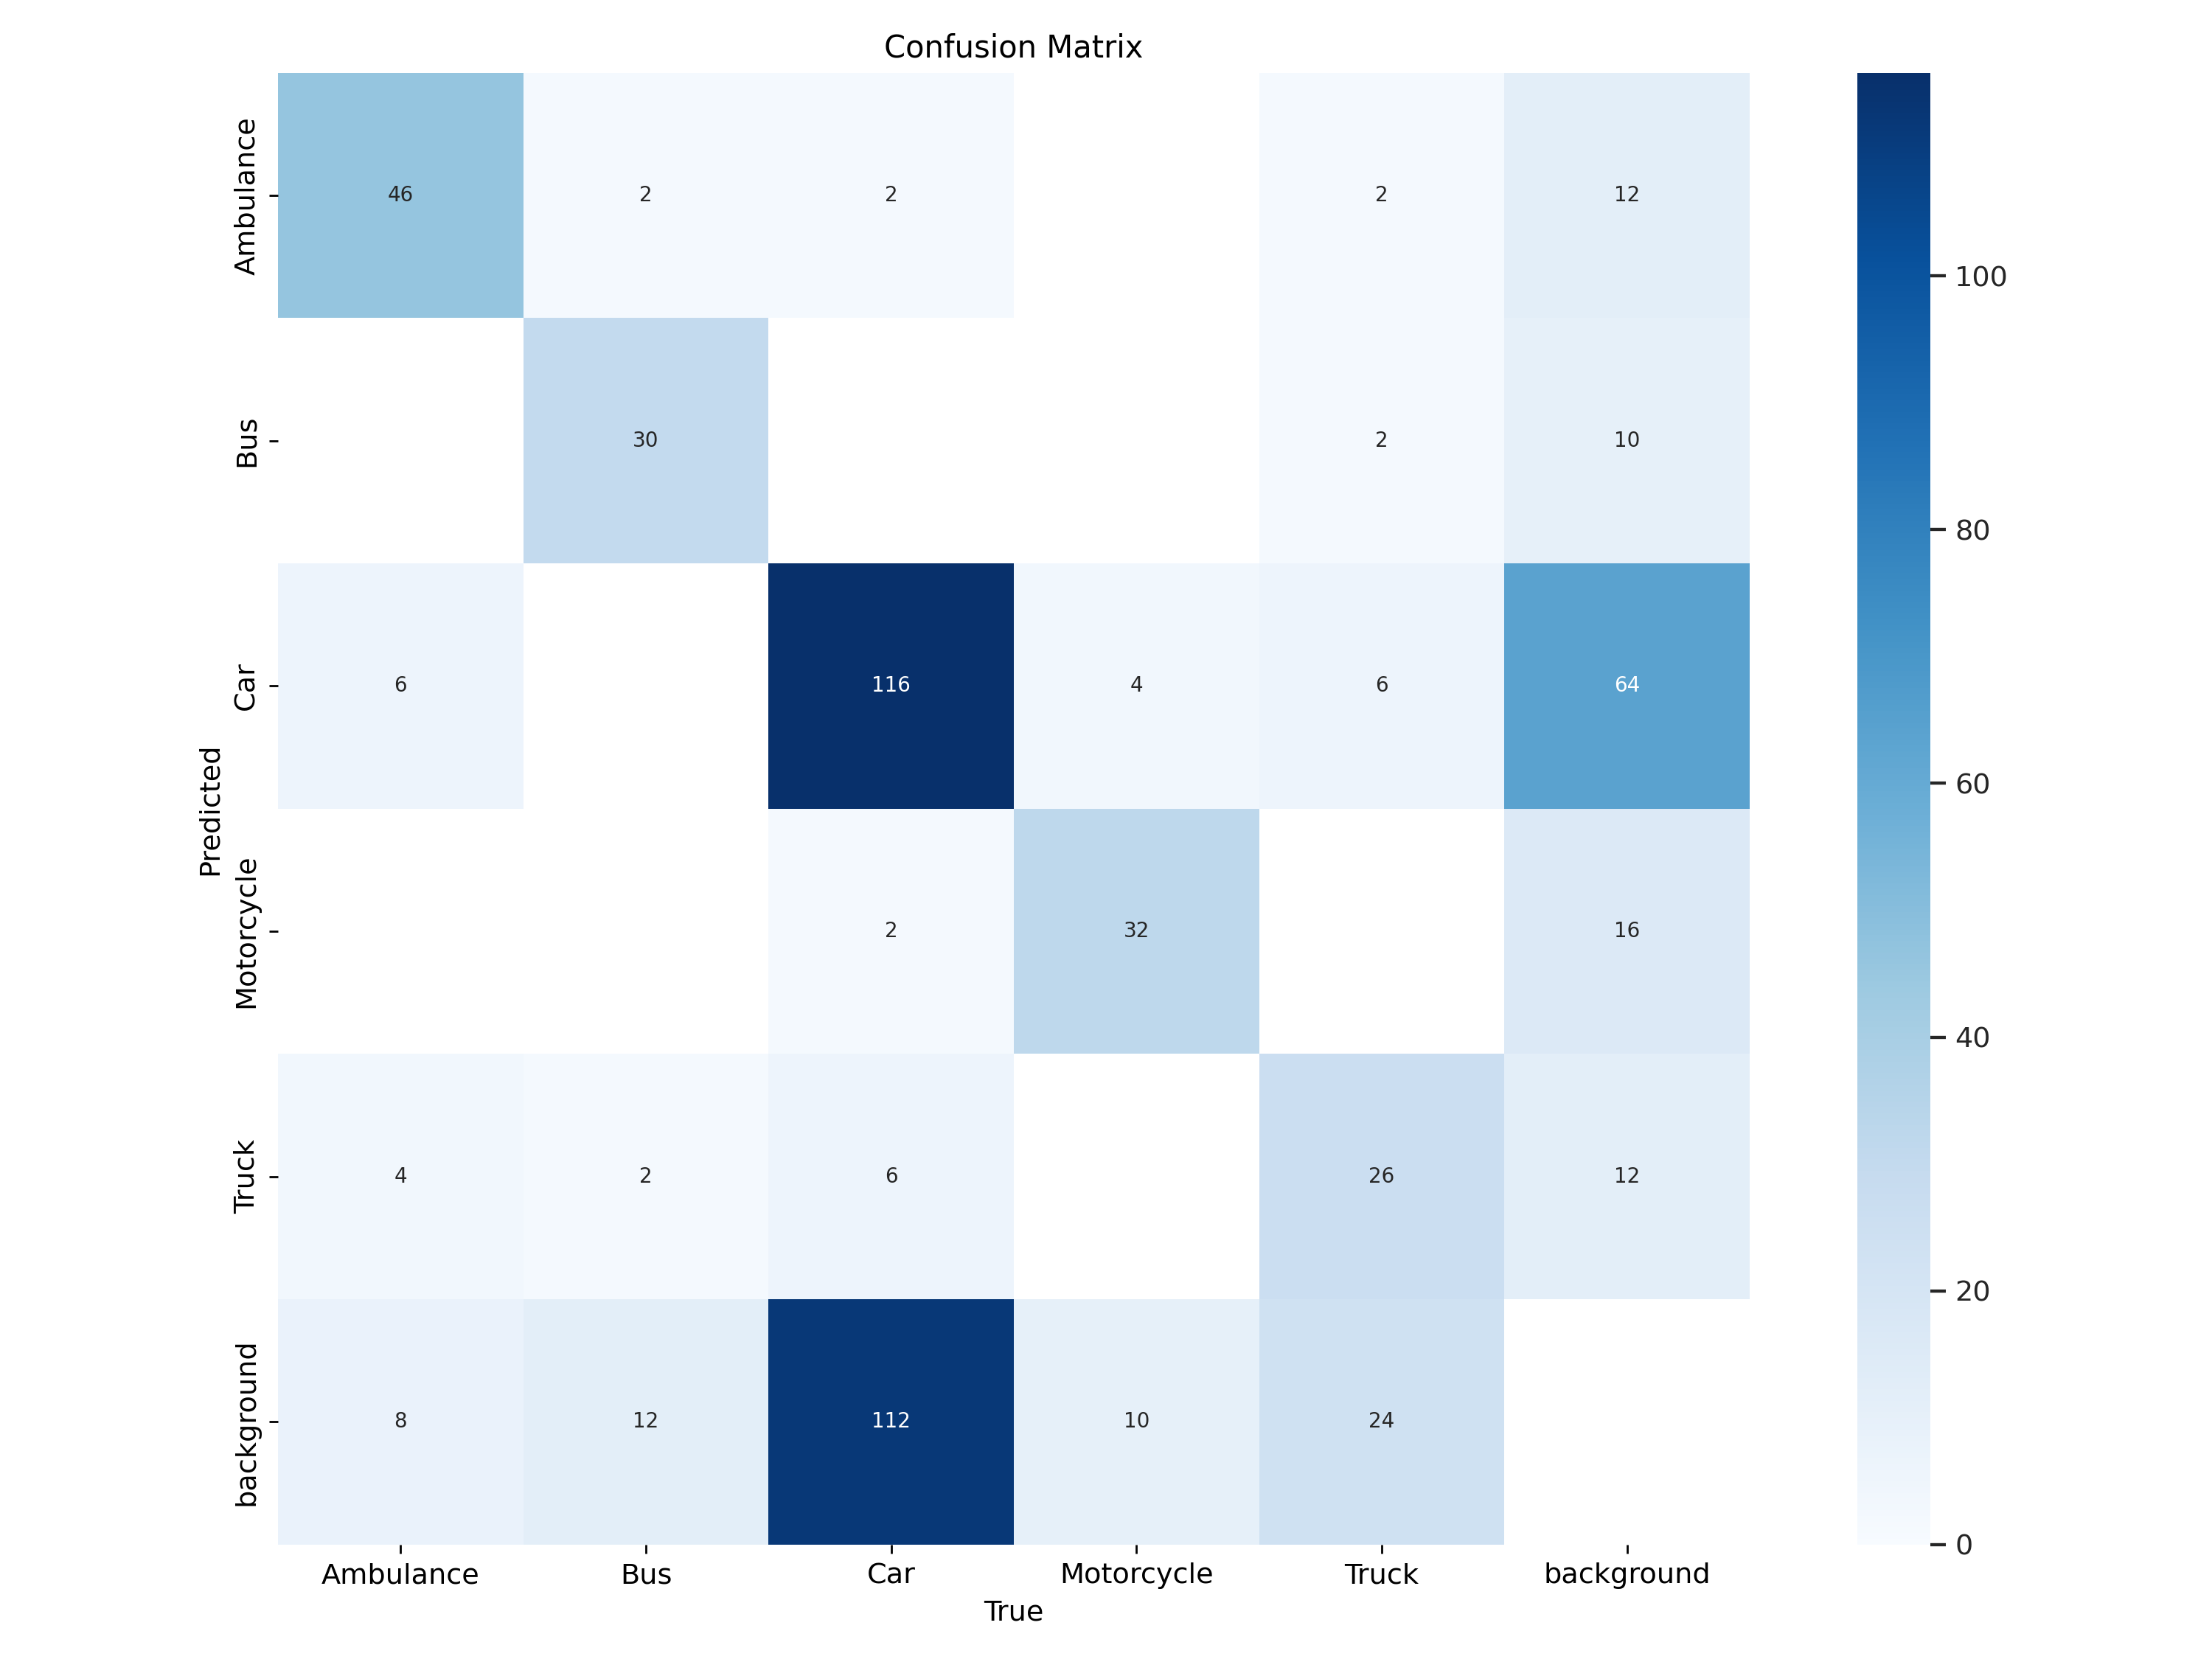

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


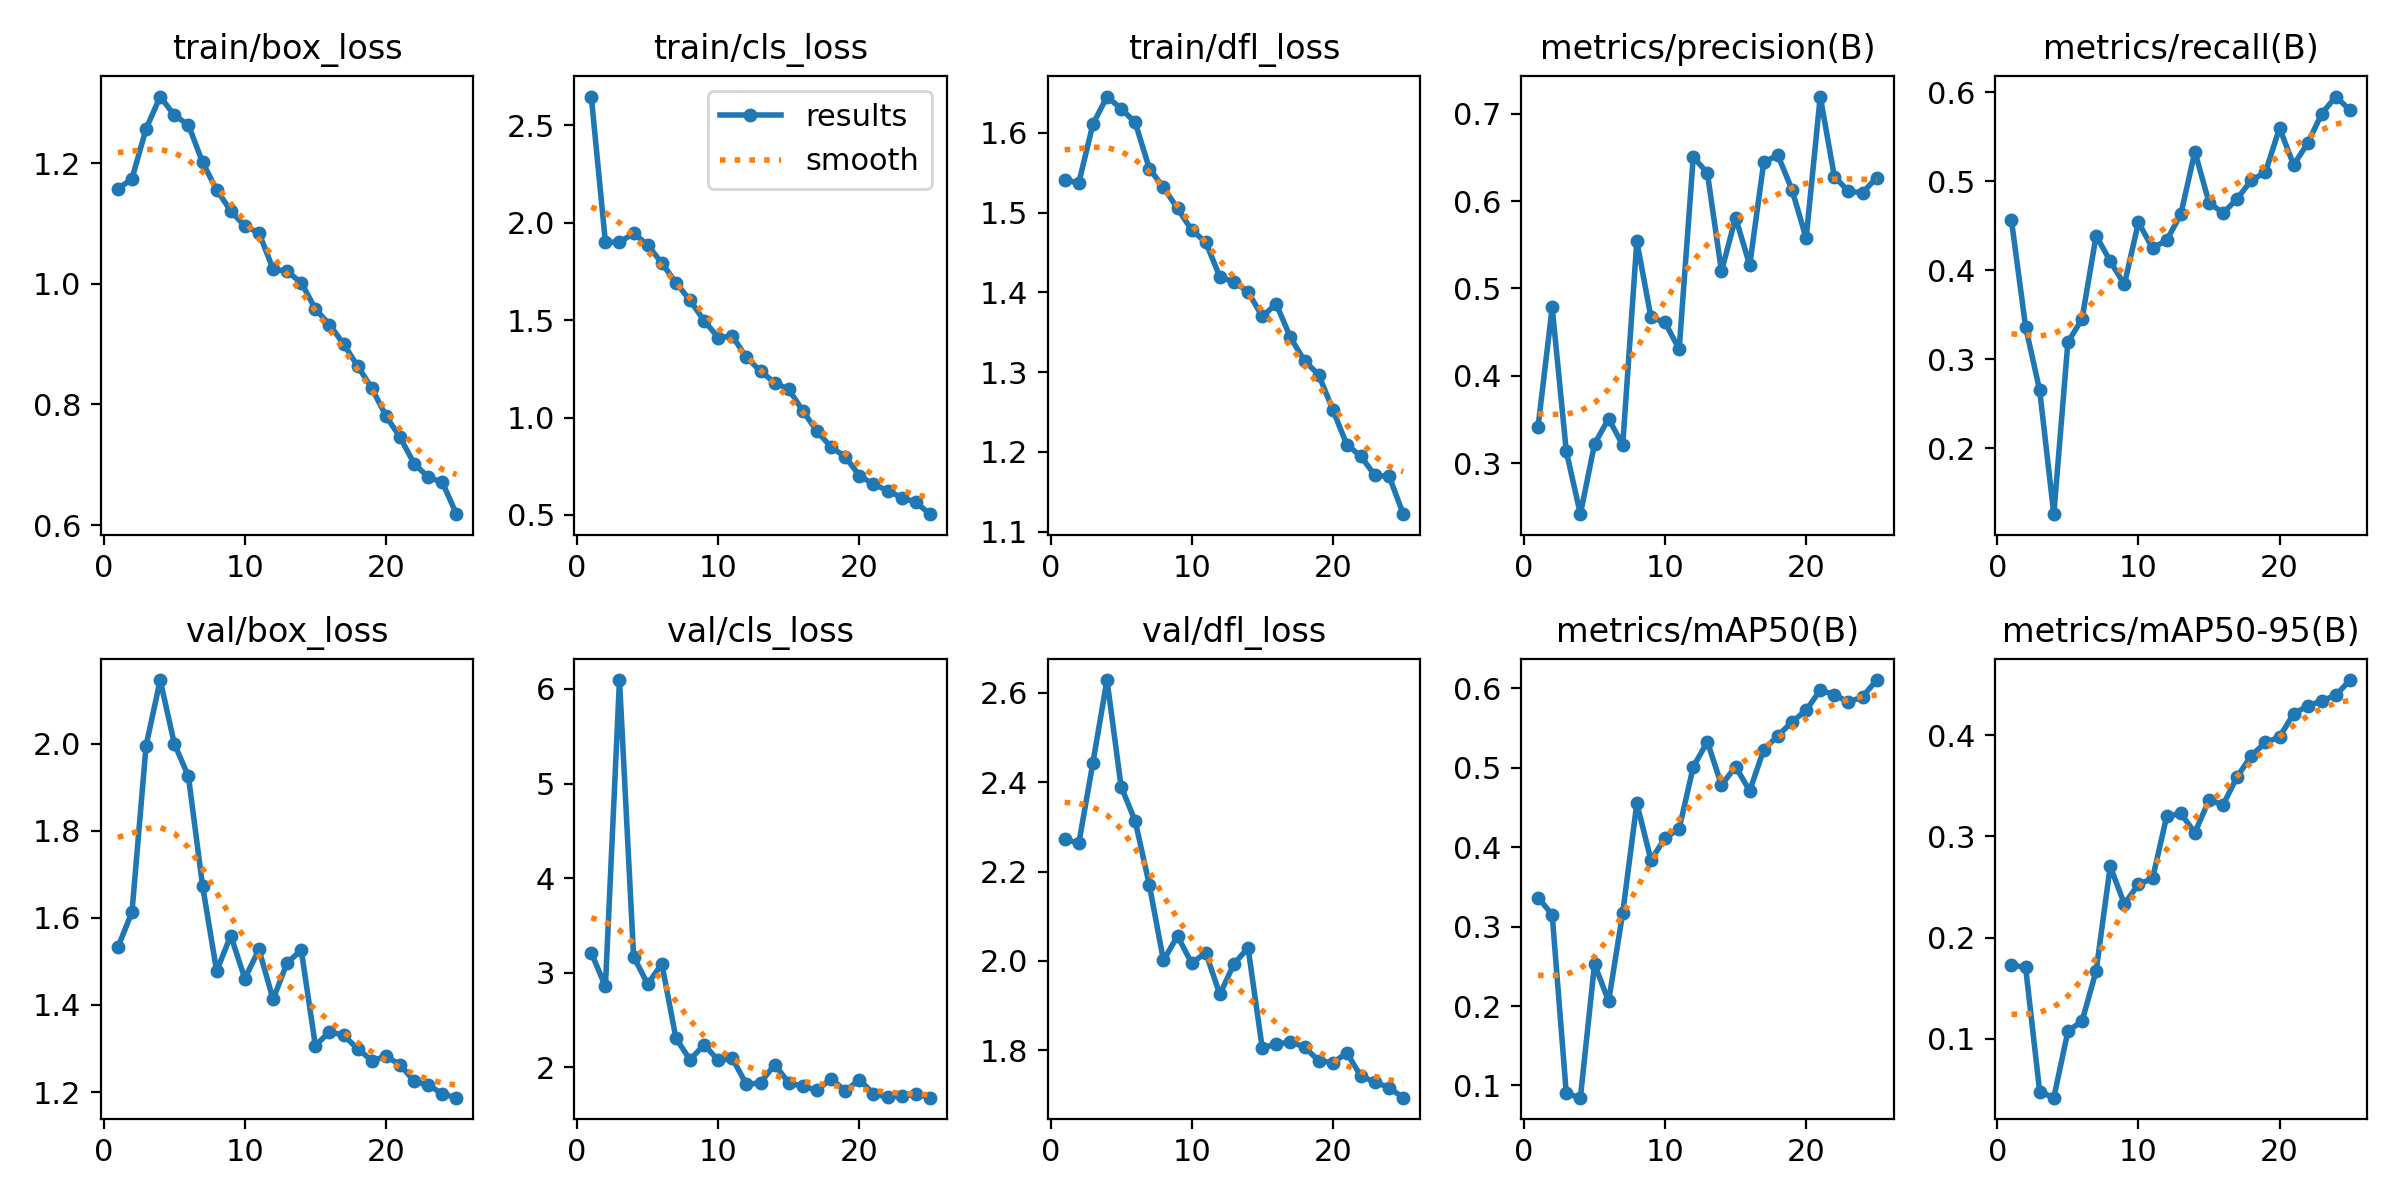

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


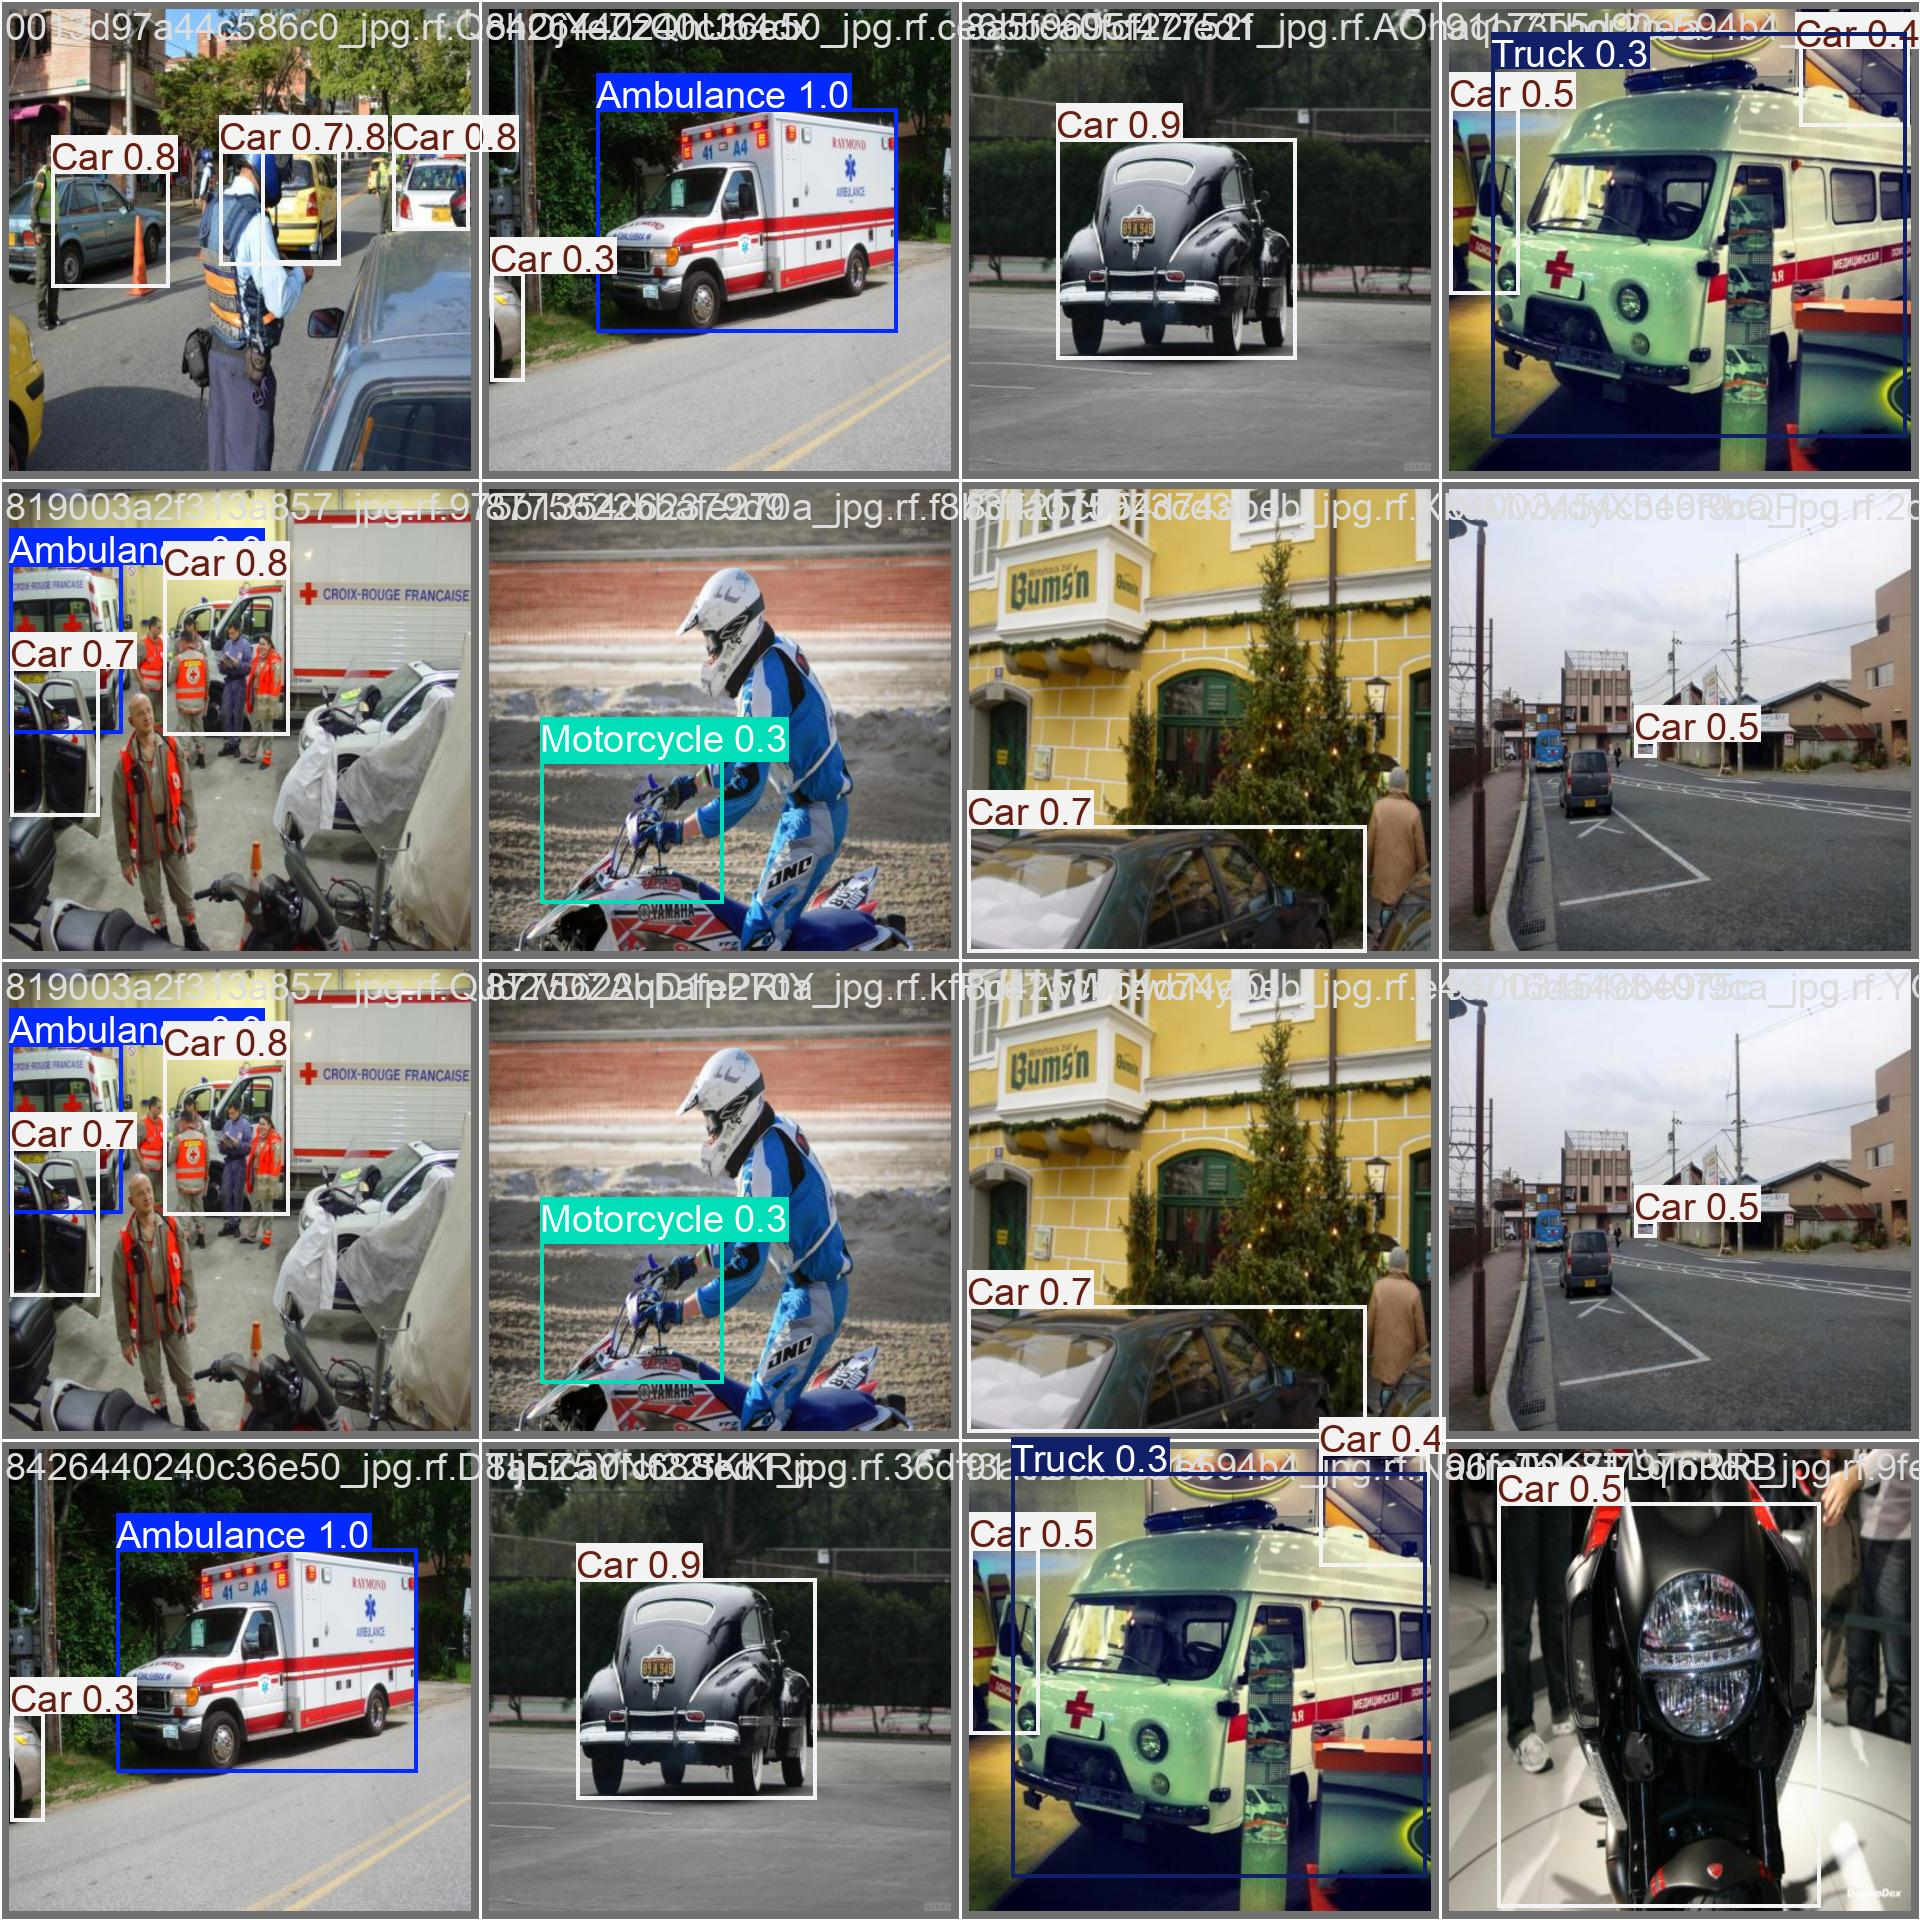

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 /content/runs/IMG_0001.JPG: 384x640 9 persons, 24 cars, 1 boat, 39.5ms
Speed: 3.7ms preprocess, 39.5ms inference, 650.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


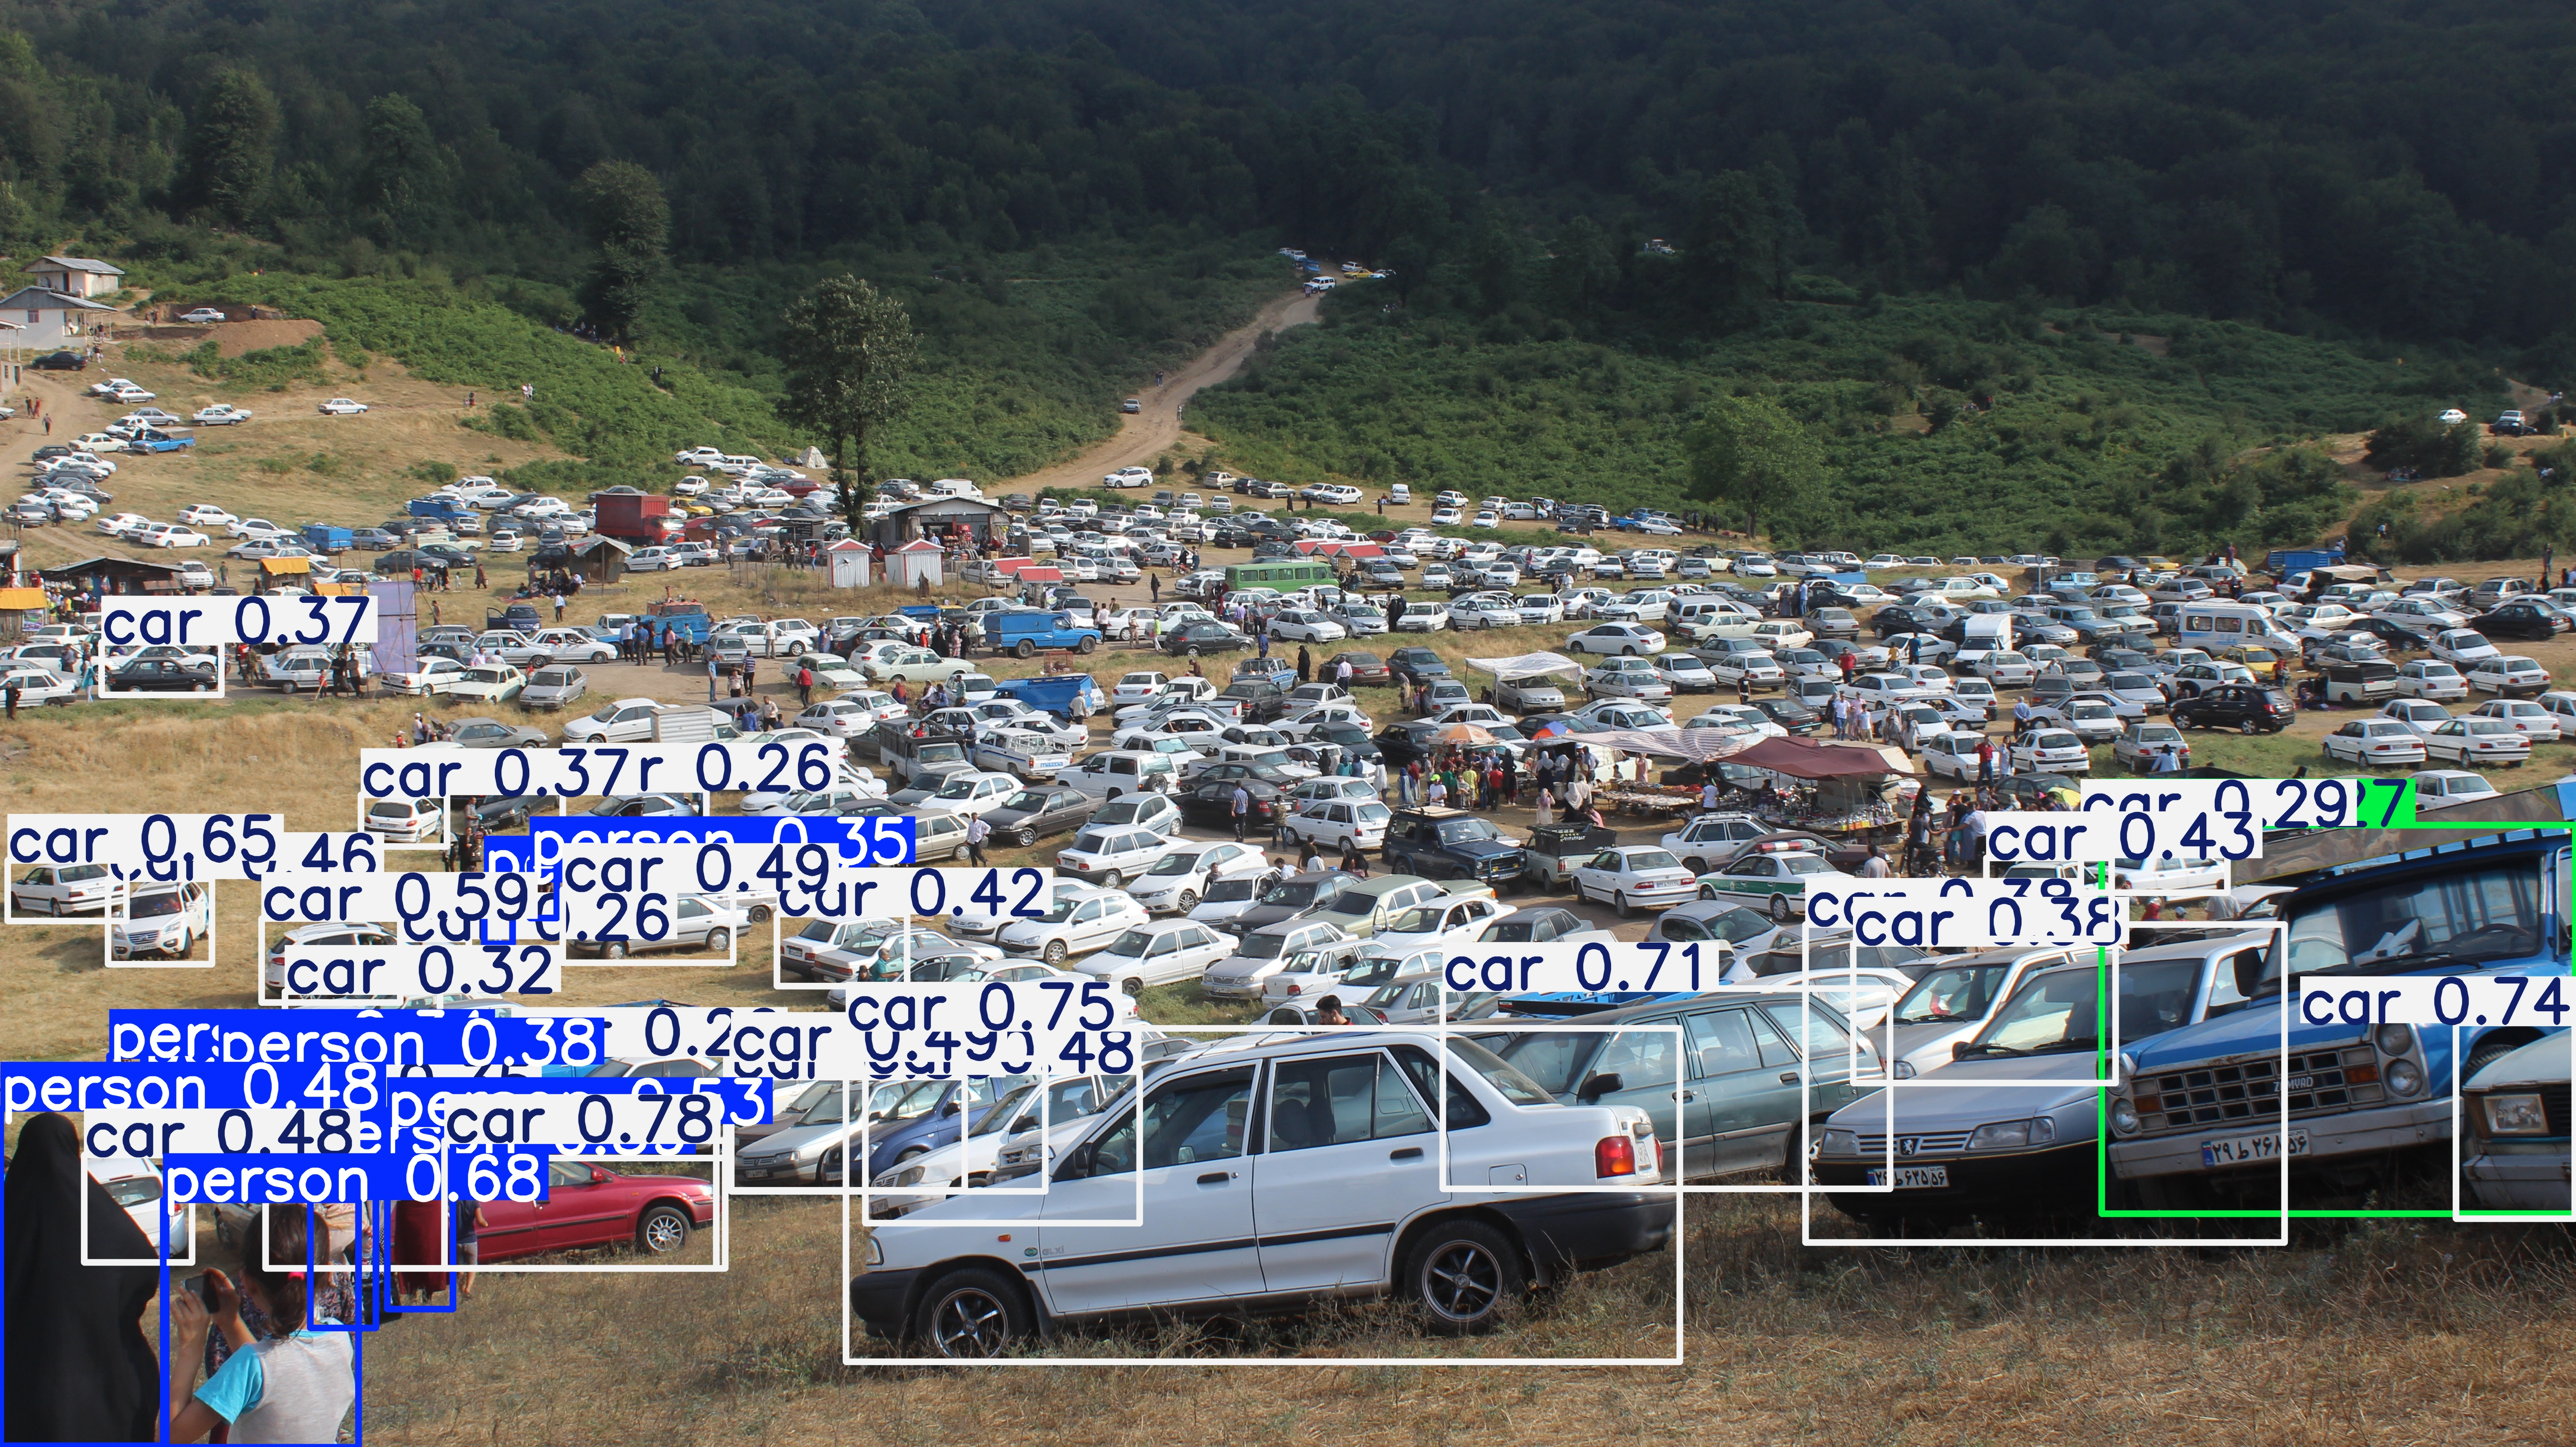

In [18]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/yolov8s.pt' conf=0.25 source='/content/runs/IMG_0001.JPG' save=True

Image(filename='/content/runs/detect/predict2/IMG_0001.JPG', height=600)